In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('35000.xlsx')

In [3]:
data

,Unnamed: 0,Title,IC50,SMILES
0,NaN,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,NaN,CHEMBL3818159,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,NaN,CHEMBL1956716,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,NaN,CHEMBL1956715,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,NaN,CHEMBL4444029,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...
...,...,...,...,...
36372,NaN,CHEMBL3699085,2366.790000,CC(=O)N[C@H]1CC[C@@H]([C@@H]12)[C@@H](O[Si](C)...
36373,NaN,CHEMBL109004,2372.100000,CC(=O)Nc(cc1)c(OC(=O)C)cc1C(=O)O
36374,NaN,CHEMBL2259758,2600.970000,c1cccc(c12)cccc2CNC(=O)CCCCCCO[C@]3(C(=O)O)C[C...
36375,NaN,CHEMBL109781,2793.000000,NCCCC(=O)Nc(c(cc1)NC(=O)C)cc1C(=O)O


In [4]:
!pip install rdkit

In [5]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors
from rdkit.Chem.Draw import IPythonConsole
from sklearn.preprocessing import FunctionTransformer

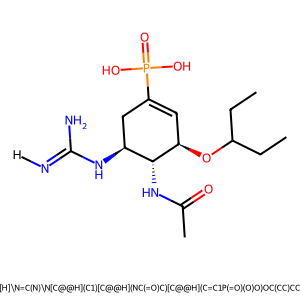

In [6]:
mol = Chem.MolFromSmiles(data['SMILES'][0])
Draw.MolToImage(mol,legend=data['SMILES'][0])

In [7]:
data['SMILES'][0]

'[H]\\N=C(N)\\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=C1P(=O)(O)O)OC(CC)CC'

In [8]:
def mol_dsc_calc(mols):
    return pd.DataFrame(Descriptors.CalcMolDescriptors(Chem.MolFromSmiles(m)) for m in mols)


Descriptors.setupAUTOCorrDescriptors()


# sklearn трансформер для использования в конвейерном моделировании
descriptors_transformer = FunctionTransformer(mol_dsc_calc)
X = descriptors_transformer.transform(data['SMILES'])

[14:19:03] Conflicting single bond directions around double bond at index 55.
[14:19:03]   BondStereo set to STEREONONE and single bond directions set to NONE.
[14:28:21] Conflicting single bond directions around double bond at index 7.
[14:28:21]   BondStereo set to STEREONONE and single bond directions set to NONE.


In [9]:
X

,AUTOCORR2D_1,AUTOCORR2D_2,AUTOCORR2D_3,AUTOCORR2D_4,AUTOCORR2D_5,AUTOCORR2D_6,AUTOCORR2D_7,AUTOCORR2D_8,AUTOCORR2D_9,AUTOCORR2D_10,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,3.583,3.822,3.805,3.922,4.078,4.027,4.003,3.410,3.119,3.365,...,0,0,0,0,0,0,0,0,0,0
1,3.185,3.501,3.561,3.528,3.585,3.353,3.245,3.240,2.988,3.224,...,0,0,0,0,0,0,0,0,0,0
2,3.185,3.511,3.613,3.566,3.676,3.453,3.270,3.006,2.988,3.213,...,0,0,0,0,0,0,0,0,0,0
3,3.142,3.481,3.543,3.537,3.624,3.300,3.191,2.845,2.936,3.172,...,0,0,0,0,0,0,0,0,0,0
4,3.414,3.818,3.846,3.775,3.664,3.491,3.345,2.964,3.162,3.496,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36372,4.063,4.410,4.339,4.348,4.438,4.535,4.491,4.551,3.846,4.151,...,0,0,0,0,0,0,0,0,0,0
36373,3.012,3.365,3.279,3.295,3.316,2.967,2.871,1.976,2.760,2.988,...,0,0,0,0,0,0,0,0,0,0
36374,4.393,4.720,4.859,4.906,4.954,4.904,4.900,4.771,4.092,4.398,...,0,1,0,0,0,0,0,0,4,0
36375,3.142,3.446,3.424,3.439,3.485,3.249,3.264,2.939,2.926,3.125,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data = pd.concat([data, X], axis=1)
data

,Unnamed: 0,Title,IC50,SMILES,AUTOCORR2D_1,AUTOCORR2D_2,AUTOCORR2D_3,AUTOCORR2D_4,AUTOCORR2D_5,AUTOCORR2D_6,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,NaN,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...,3.583,3.822,3.805,3.922,4.078,4.027,...,0,0,0,0,0,0,0,0,0,0
1,NaN,CHEMBL3818159,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...,3.185,3.501,3.561,3.528,3.585,3.353,...,0,0,0,0,0,0,0,0,0,0
2,NaN,CHEMBL1956716,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...,3.185,3.511,3.613,3.566,3.676,3.453,...,0,0,0,0,0,0,0,0,0,0
3,NaN,CHEMBL1956715,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...,3.142,3.481,3.543,3.537,3.624,3.300,...,0,0,0,0,0,0,0,0,0,0
4,NaN,CHEMBL4444029,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...,3.414,3.818,3.846,3.775,3.664,3.491,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36372,NaN,CHEMBL3699085,2366.790000,CC(=O)N[C@H]1CC[C@@H]([C@@H]12)[C@@H](O[Si](C)...,4.063,4.410,4.339,4.348,4.438,4.535,...,0,0,0,0,0,0,0,0,0,0
36373,NaN,CHEMBL109004,2372.100000,CC(=O)Nc(cc1)c(OC(=O)C)cc1C(=O)O,3.012,3.365,3.279,3.295,3.316,2.967,...,0,0,0,0,0,0,0,0,0,0
36374,NaN,CHEMBL2259758,2600.970000,c1cccc(c12)cccc2CNC(=O)CCCCCCO[C@]3(C(=O)O)C[C...,4.393,4.720,4.859,4.906,4.954,4.904,...,0,1,0,0,0,0,0,0,4,0
36375,NaN,CHEMBL109781,2793.000000,NCCCC(=O)Nc(c(cc1)NC(=O)C)cc1C(=O)O,3.142,3.446,3.424,3.439,3.485,3.249,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data.to_excel('big.xlsx', index=False)